Solving the Diffusion equation
$$
\begin{aligned}
&\begin{aligned}
& \frac{\partial \bar{B}_r}{\partial t}= \eta \frac{\partial}{\partial r}\left[\frac{1}{r} \frac{\partial}{\partial r}\left(r \bar{B}_r\right)\right]-\eta \frac{\partial^2 \bar{B}_r}{\partial z^2} , \\
& \frac{\partial \bar{B}_\phi}{\partial t}=\eta \frac{\partial}{\partial r}\left[\frac{1}{r} \frac{\partial}{\partial r}\left(r \bar{B}_\phi\right)\right] -\eta \frac{\partial^2 \bar{B}_\phi}{\partial z^2} \\
\end{aligned}
\end{aligned}
$$

Using no-z approximtion. We get the equations as follows:
$$
\begin{aligned}
&\begin{aligned}
& \frac{\partial \bar{B}_r}{\partial t}= \eta \frac{\partial}{\partial r}\left[\frac{1}{r} \frac{\partial}{\partial r}\left(r \bar{B}_r\right)\right] - \eta \frac{\pi^2}{4h^2} \bar{B}_r , \\
& \frac{\partial \bar{B}_\phi}{\partial t}=\eta \frac{\partial}{\partial r}\left[\frac{1}{r} \frac{\partial}{\partial r}\left(r \bar{B}_\phi\right)\right] - \eta \frac{\pi^2}{4h^2} \bar{B}_\phi\\
\end{aligned}
\end{aligned}
$$

Now making the same equations Dimensionaless
$$
\begin{aligned}
&\begin{aligned}
& \frac{\partial \bar{B}_r}{\partial t}= \left(\frac{h_0}{R_0}\right)^2 \frac{\partial}{\partial r}\left[\frac{1}{r} \frac{\partial}{\partial r}\left(r \bar{B}_r\right)\right] - \frac{\pi^2 \bar{B}_r}{4}, \\
& \frac{\partial \bar{B}_\phi}{\partial t}=\left(\frac{h_0}{R_0}\right)^2 \frac{\partial}{\partial r}\left[\frac{1}{r} \frac{\partial}{\partial r}\left(r \bar{B}_\phi\right)\right] - \frac{\pi^2 \bar{B}_\phi}{4}\\
\end{aligned}
\end{aligned}
$$



# Boundary Conditions
$$
Br(R_0)= 0 =Br(0)\\
B_\phi(R_0)=0 = B_\phi(0)\\
$$

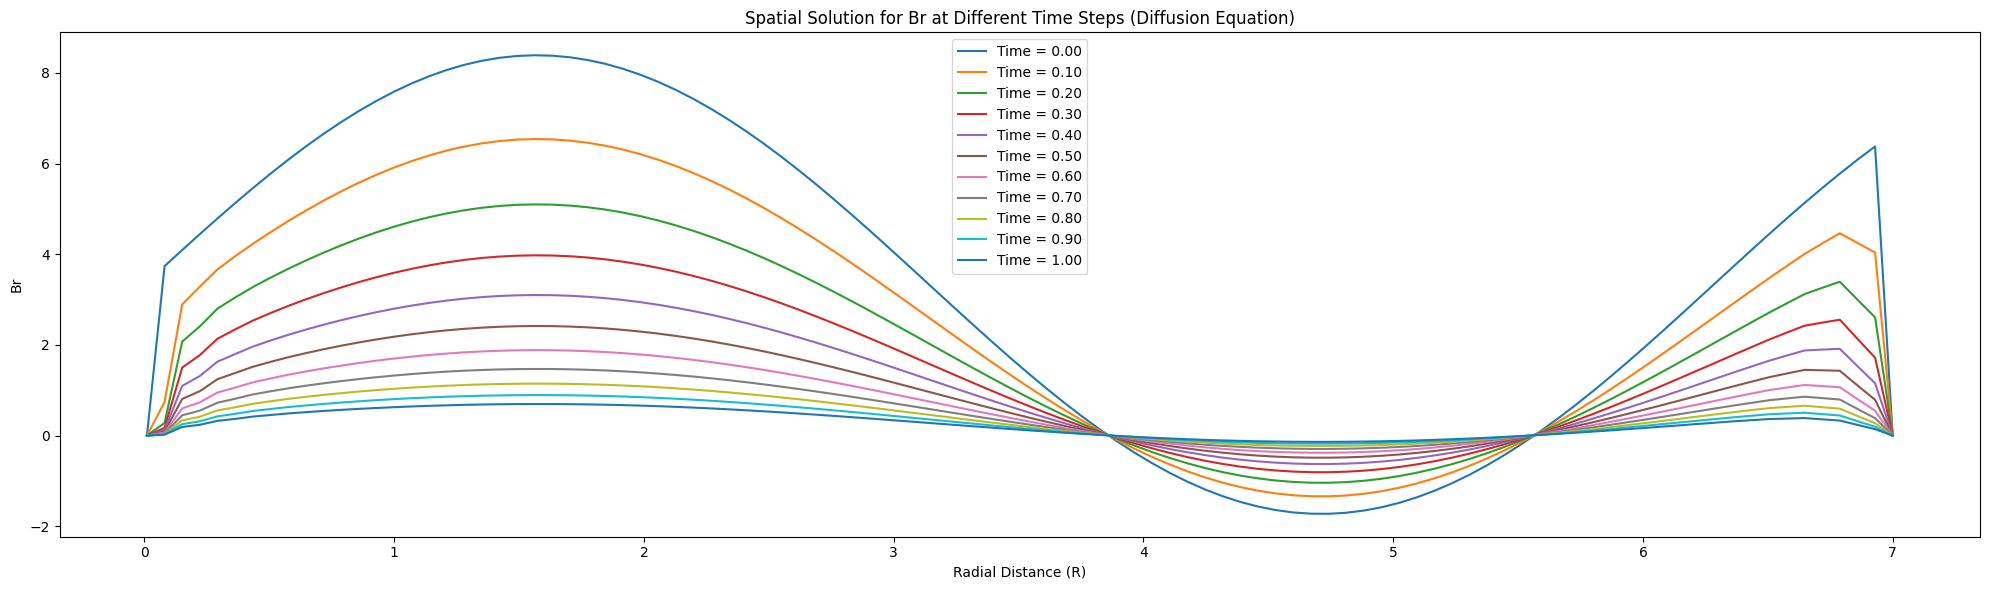

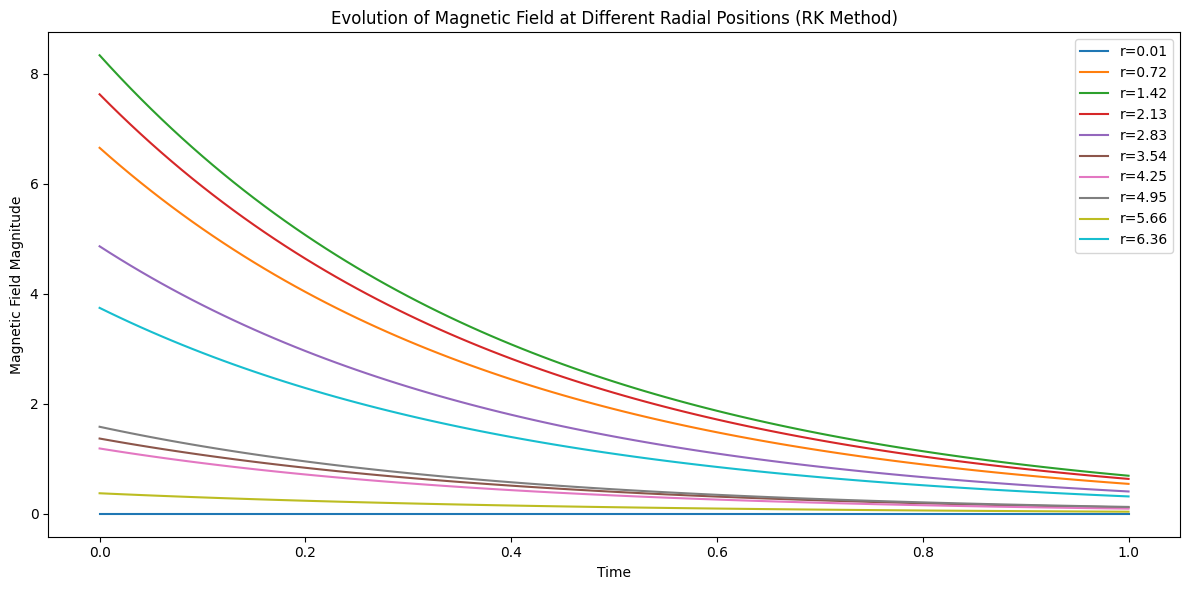

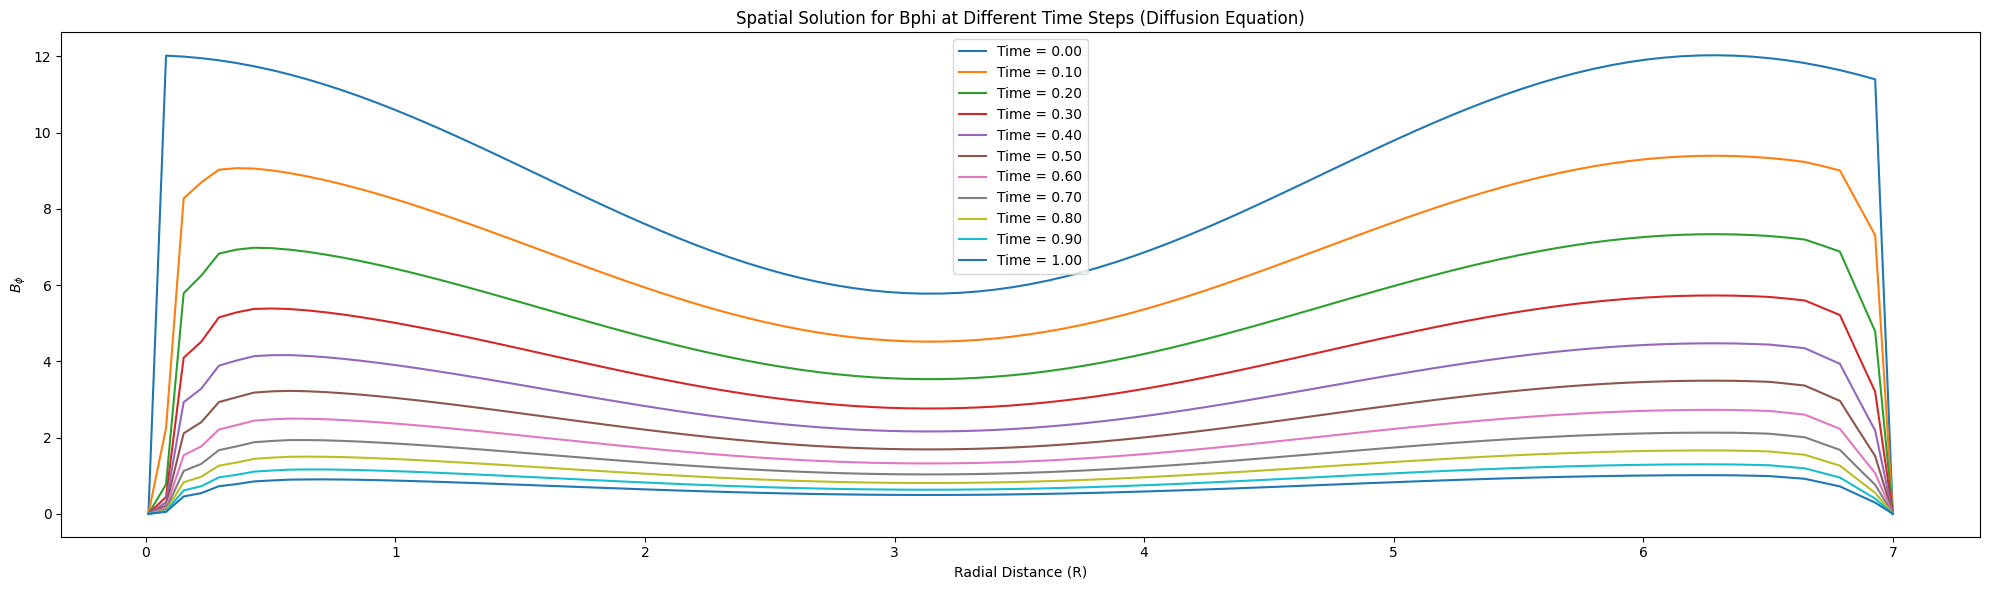

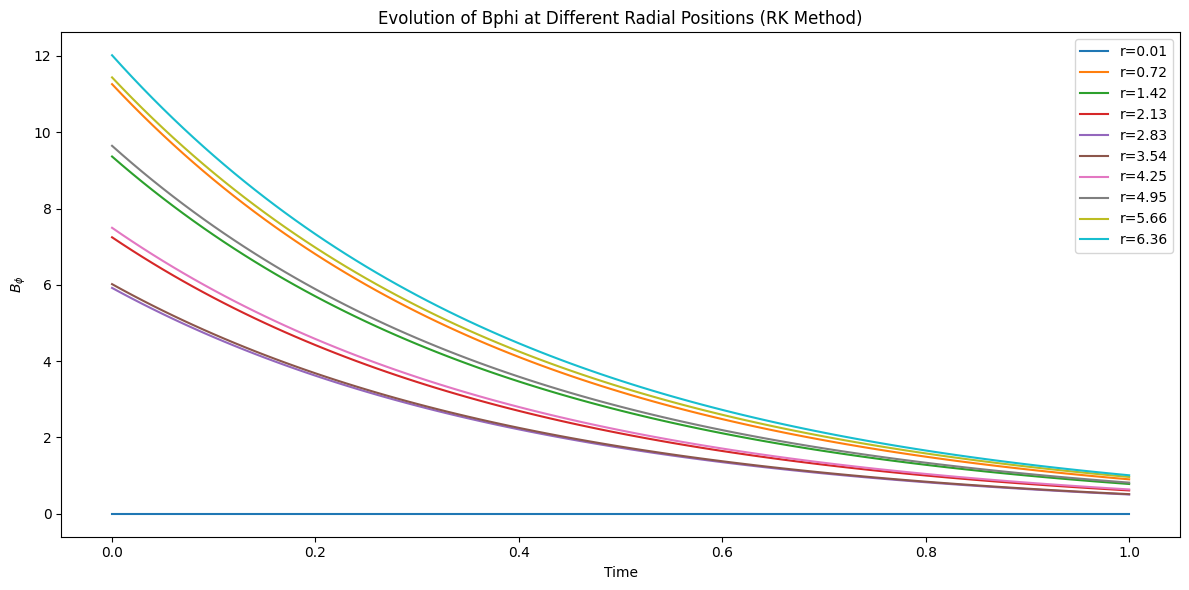

In [4]:
# Librarires
import numpy as np
import matplotlib.pyplot as plt

#Define Constants
h=1

#Define radial grid parameters
r_min = 0.01   # Minimum radial coordinate
r_max = 7.0   # Maximum radial coordinate
Nr = 100      # Number of grid points
r_values = np.linspace(r_min, r_max, Nr) # Create radial grid
dr= (r_max - r_min)/Nr

#Define Time parameters
t_min = 0
t_max = 1
Nt = 100 
t_values= np.linspace(t_min,t_max,Nt)
dt = (t_max - t_min)/Nt
#Define initial see magnetic field
Br= np.sin(r_values)*np.random.rand()*10 + np.random.rand()*10
Bphi= np.cos(r_values)*np.random.rand()*10 + np.random.rand()*10

#Going for the RHS
def First_term(B_r):
    return h**2/r_max**2 * np.gradient(1/r_values * np.gradient(r_values * B_r,dr),dr)
    
def Second_term(B_r):
    return (np.pi**2 *B_r)/(4)

def RHS(B_r):
    return (First_term(B_r) - Second_term(B_r))


# Function to perform RK4 time integration
def rk4_integration(B_r,B_phi):
    k1 = dt * RHS(B_r)
    k2 = dt * RHS(B_r + 0.5 * k1)
    k3 = dt * RHS(B_r + 0.5 * k2)
    k4 = dt * RHS(B_r + k3)
    
    l1 = dt * RHS(B_phi)
    l2 = dt * RHS(B_phi+ 0.5 * l1)
    l3 = dt * RHS(B_phi + 0.5 * l2)
    l4 = dt * RHS(B_phi + l3)
    

    B_r_new = B_r + (k1 + 2*k2 + 2*k3 + k4) / 6
    B_phi_new = B_phi + (l1 +2*l2 + 2*l3 + l4)/6
    return B_r_new,B_phi_new

# Br and Bphi are functions of Space and time. Here we are considering only r-direction. 
# We will create 2D array, where each column specifies the field evolution w.r.to time at a given radial distance.
# Similrly rows specifies field evolution w.r.to radial distance at a given time step.
Br_Evolution = np.zeros((Nt + 1, Nr))
Bphi_Evolution = np.zeros((Nt + 1, Nr))

# Time-stepping scheme using Runge-Kutta
for t in range(Nt + 1):
    #Boundary Condition
    Br[0]=0
    Br[-1]=0
    Bphi[0]=0
    Bphi[-1]=0
    
    Br_Evolution[t, :] = np.copy(Br)
    Bphi_Evolution[t, :] = np.copy(Bphi)
    Br,Bphi = rk4_integration(Br,Bphi)
    
# Plot the spatial solution for Br
plt.figure(figsize=(20, 6))
for t in range(0, Nt + 1, Nt // 10):  # Plot every 10th time step
    plt.plot(r_values, Br_Evolution[t, :], label=f'Time = {t * dt:.2f}')
plt.xlabel('Radial Distance (R)')
plt.ylabel('Br')
plt.title('Spatial Solution for Br at Different Time Steps (Diffusion Equation)')
plt.legend()
plt.tight_layout()
plt.show()

# Plot the evolution of magnetic field at different radial positions over time
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0, t_max, Nt + 1),np.abs(Br_Evolution[:, ::Nr//10]))
plt.xlabel('Time')
plt.ylabel('Magnetic Field Magnitude')
plt.title('Evolution of Magnetic Field at Different Radial Positions (RK Method)')
plt.legend([f'r={r_values[i]:.2f}' for i in range(0, Nr, Nr//10)])
plt.tight_layout()
plt.show()

# Plot the spatial solution for Bphi
plt.figure(figsize=(20, 6))
for t in range(0, Nt + 1, Nt // 10):  # Plot every 10th time step
    plt.plot(r_values, Bphi_Evolution[t, :], label=f'Time = {t * dt:.2f}')
plt.xlabel('Radial Distance (R)')
plt.ylabel(r'$B_\phi$')
plt.title('Spatial Solution for Bphi at Different Time Steps (Diffusion Equation)')
plt.legend()
plt.tight_layout()
plt.show()

# Plot the evolution of magnetic field at different radial positions over time
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0, t_max, Nt + 1),np.abs(Bphi_Evolution[:, ::Nr//10]))
plt.xlabel('Time')
plt.ylabel(r'$B_\phi$')
plt.title('Evolution of Bphi at Different Radial Positions (RK Method)')
plt.legend([f'r={r_values[i]:.2f}' for i in range(0, Nr, Nr//10)])
plt.tight_layout()
plt.show()


# Exponential Decay Rate

$$
\text{The solution after a long time turns out in the form of exponential}\\
\begin{aligned}
log_{10}(Br) = \gamma ~ t ~ log_{10}(e) + constant
\end{aligned}
$$

C:\Users\DELL\AppData\Local\Temp\ipykernel_18828\742274150.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.linspace(0, t_max, Nt + 1),np.log10(np.abs(Br_Evolution[:, ::Nr//10])))


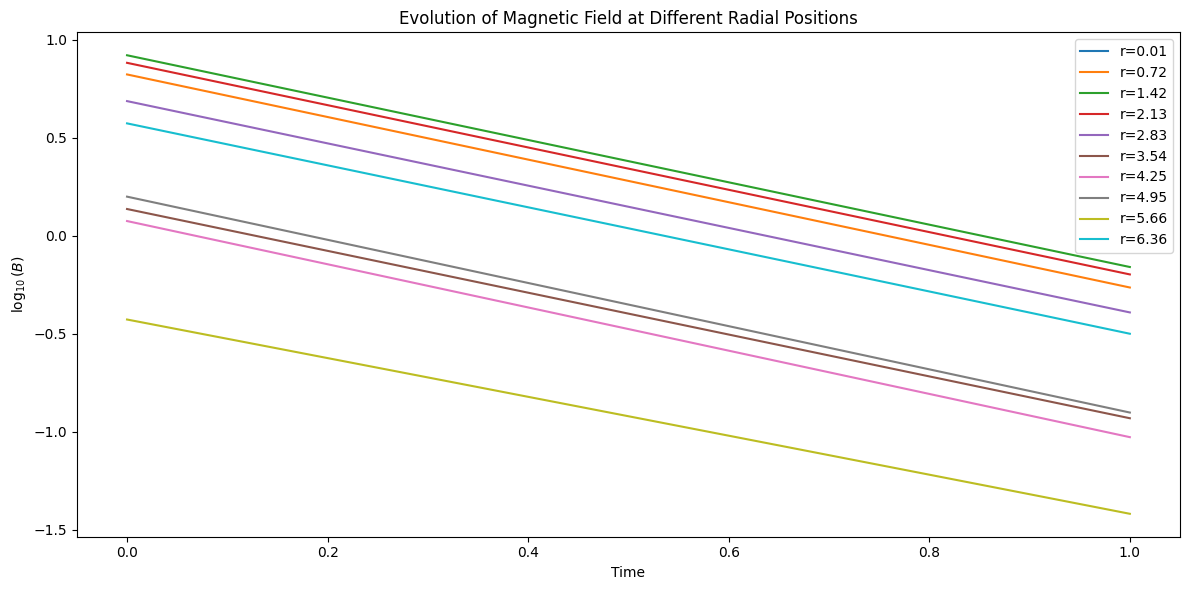

C:\Users\DELL\AppData\Local\Temp\ipykernel_18828\742274150.py:15: RuntimeWarning: divide by zero encountered in log10
  slope_Br.append(np.log10(np.abs(Br_Evolution[40, i]))-(np.log10(np.abs(Br_Evolution[80, i])))/(t_values[40]-t_values[80])/0.43429)
C:\Users\DELL\AppData\Local\Temp\ipykernel_18828\742274150.py:16: RuntimeWarning: divide by zero encountered in log10
  slope_Bphi.append(np.log10(np.abs(Bphi_Evolution[40, i]))-(np.log10(np.abs(Bphi_Evolution[80, i])))/(t_values[40]-t_values[80])/0.43429)


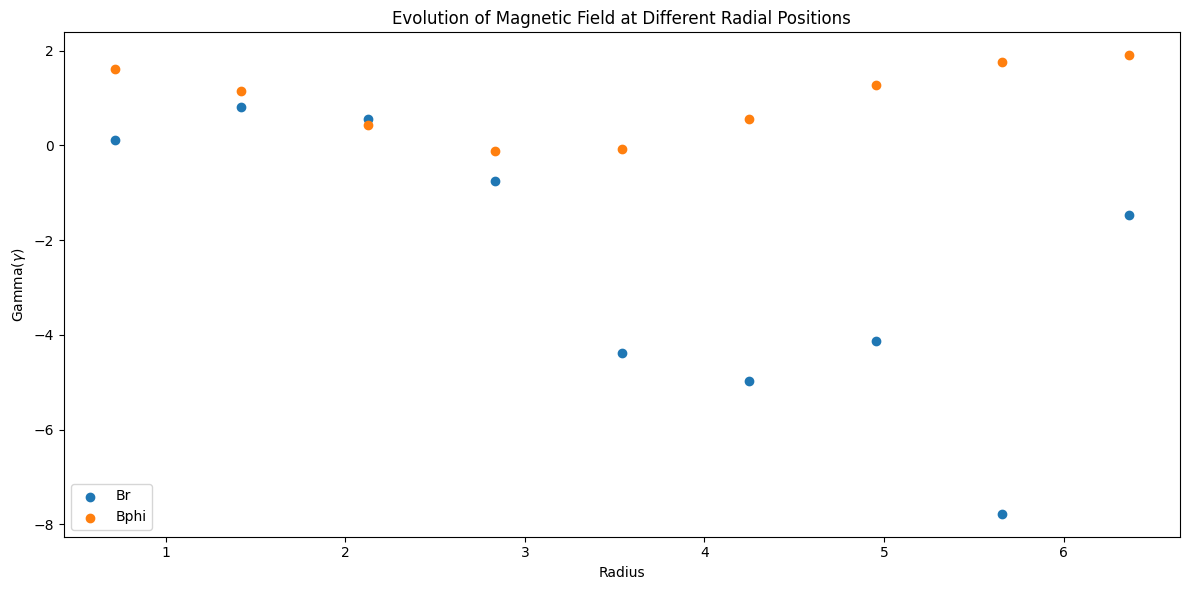

In [5]:
# Plot the evolution of magnetic field at different radial positions over time
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0, t_max, Nt + 1),np.log10(np.abs(Br_Evolution[:, ::Nr//10])))
plt.xlabel('Time')
plt.ylabel(r'$\log_{10}(B)$')
plt.title('Evolution of Magnetic Field at Different Radial Positions')
plt.legend([f'r={r_values[i]:.2f}' for i in range(0, Nr, Nr//10)])
plt.tight_layout()
plt.show()

# Loop to find the exponential decay rate for different radial positions. 
slope_Br=[]
slope_Bphi=[]
for i in range(0,Nr,10):
    slope_Br.append(np.log10(np.abs(Br_Evolution[40, i]))-(np.log10(np.abs(Br_Evolution[80, i])))/(t_values[40]-t_values[80])/0.43429)
    slope_Bphi.append(np.log10(np.abs(Bphi_Evolution[40, i]))-(np.log10(np.abs(Bphi_Evolution[80, i])))/(t_values[40]-t_values[80])/0.43429)

# Plot the exponential decay rate for different radial distances.
plt.figure(figsize=(12, 6))
plt.scatter(r_values[0:Nr:10],slope_Br, label='Br')
plt.scatter(r_values[0:Nr:10],slope_Bphi, label='Bphi')
plt.xlabel('Radius')
plt.ylabel(r'Gamma($\gamma$)')
plt.title('Evolution of Magnetic Field at Different Radial Positions')
plt.legend()
plt.tight_layout()
plt.show()

# Pitch Angle

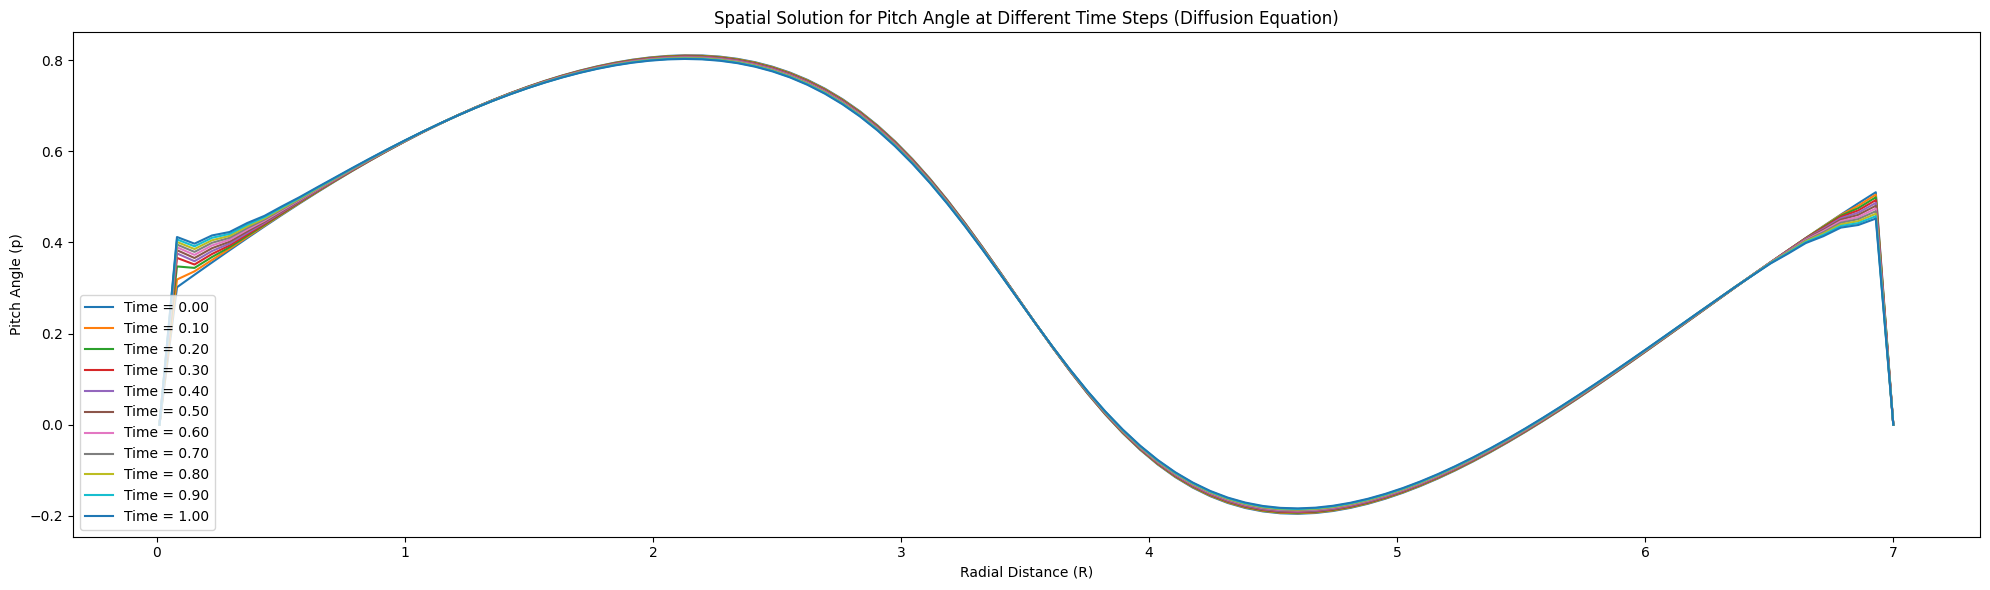

In [6]:
# Function to compute the pitch angle
def Pitch_angle(Br, Bphi):
    return np.arctan2(Br, Bphi)

# Store the evolution of pitch angle at different time steps
evolution_pitch = np.zeros((Nt + 1, Nr))

# Time-stepping scheme using Runge-Kutta
for t in range(Nt + 1):
    evolution_pitch[t, :] = Pitch_angle(Br_Evolution[t, :], Bphi_Evolution[t, :])

# Plot the spatial solution for the pitch angle
plt.figure(figsize=(20, 6))
for t in range(0, Nt + 1, Nt // 10):  # Plot every 10th time step
    plt.plot(r_values, evolution_pitch[t, :], label=f'Time = {t * dt:.2f}')
plt.xlabel('Radial Distance (R)')
plt.ylabel('Pitch Angle (p)')
plt.title('Spatial Solution for Pitch Angle at Different Time Steps (Diffusion Equation)')
plt.legend()
plt.tight_layout()
plt.show()